In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

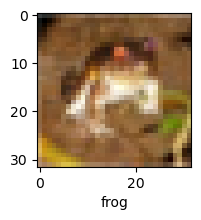

In [10]:
plot_sample(X_train, y_train, 0)

In [11]:
# Scaling
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4615 - accuracy: 0.4765
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1216 - accuracy: 0.6067
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0034 - accuracy: 0.6498
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9308 - accuracy: 0.6753
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8727 - accuracy: 0.6960
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8222 - accuracy: 0.7136
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7686 - accuracy: 0.7334
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7269 - accuracy: 0.7471
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6861 - accuracy: 0.7612
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [14]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9431 - accuracy: 0.6876


[0.9430596828460693, 0.6876000165939331]

In [15]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[6.33791275e-03, 3.23454151e-04, 4.24225722e-03, 5.03003776e-01,
        9.37959645e-04, 6.06179945e-02, 3.42500880e-02, 4.89451224e-04,
        3.89605194e-01, 1.91951549e-04],
       [3.17855440e-02, 2.07273275e-01, 1.13669339e-05, 1.50379456e-05,
        1.56794056e-06, 2.05749288e-07, 8.87998475e-09, 3.65172862e-04,
        7.48579025e-01, 1.19688362e-02],
       [1.29618108e-01, 9.19668600e-02, 3.06324626e-04, 1.17934300e-02,
        1.03920395e-03, 9.13058931e-04, 8.77428567e-04, 1.85948629e-02,
        6.67451680e-01, 7.74390399e-02],
       [8.77573013e-01, 3.68036819e-03, 6.57617906e-03, 6.82834943e-04,
        7.03642610e-03, 4.22377634e-05, 2.81640132e-05, 1.57886476e-04,
        1.03796594e-01, 4.26317245e-04],
       [3.73493162e-06, 7.92223655e-05, 1.68951228e-03, 3.34752835e-02,
        6.59218848e-01, 6.91536302e-03, 2.98492670e-01, 3.14056742e-05,
        9.28091977e-05, 1.09963344e-06]], dtype=float32)

In [16]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [17]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

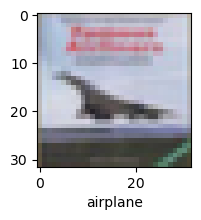

In [18]:
plot_sample(X_test, y_test,3)

In [19]:
classes[y_classes[3]]

'airplane'